<a href="https://colab.research.google.com/github/Kegmar/Logistic-ProjectC02nFuel/blob/master/LogisticProjC02nFuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [267]:
# Data loading
data = "/content/ship_fuel_efficiency.csv"

data = pd.read_csv(data)

In [268]:
# Summarizing data
summary = data.describe(include='all')
summary

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
count,1440,1440,1440,1440,1440.000000,1440,1440.000000,1440.000000,1440,1440.000000
unique,120,4,4,12,NaN,2,NaN,NaN,3,NaN
top,NG001,Oil Service Boat,Port Harcourt-Lagos,January,NaN,Diesel,NaN,NaN,Calm,NaN
freq,12,408,389,120,NaN,899,NaN,NaN,516,NaN
mean,NaN,NaN,NaN,NaN,151.753354,NaN,4844.246535,13365.454882,NaN,82.582924
std,NaN,NaN,NaN,NaN,108.472230,NaN,4892.352813,13567.650118,NaN,7.158289
min,NaN,NaN,NaN,NaN,20.080000,NaN,237.880000,615.680000,NaN,70.010000
25%,NaN,NaN,NaN,NaN,79.002500,NaN,1837.962500,4991.485000,NaN,76.255000
50%,NaN,NaN,NaN,NaN,123.465000,NaN,3060.880000,8423.255000,NaN,82.775000
75%,NaN,NaN,NaN,NaN,180.780000,NaN,4870.675000,13447.120000,NaN,88.862500


In [269]:
# Data preparation for clustering
clustering_data = data[['engine_efficiency', 'fuel_consumption']]

In [270]:
# Scale data for proper clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [271]:
# KMean clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluseter'] = kmeans.fit_predict(scaled_data)

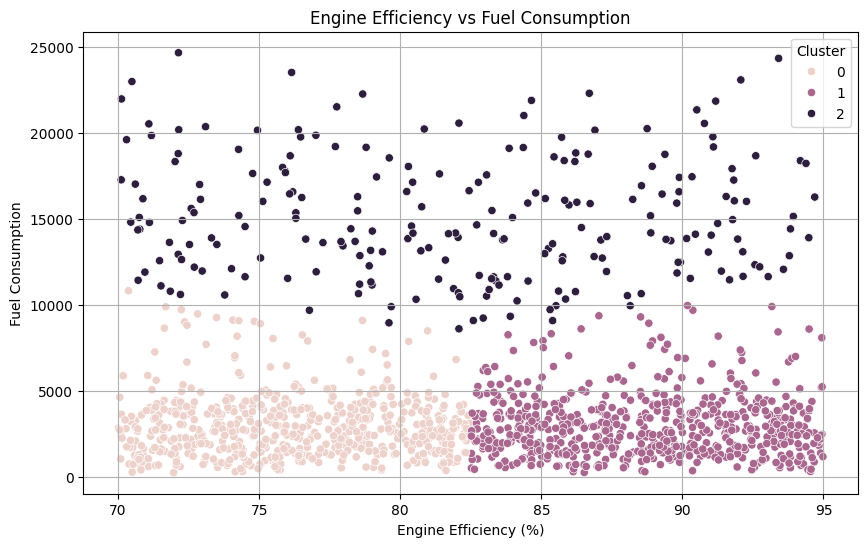

In [272]:
# Cluster visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='engine_efficiency', y='fuel_consumption', hue='cluseter')
plt.title('Engine Efficiency vs Fuel Consumption')
plt.xlabel('Engine Efficiency (%)')
plt.ylabel('Fuel Consumption')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [273]:
# Fuel consumption by route
route_summary = data.groupby('route_id')[['fuel_consumption', 'distance']].sum()
route_summary['fuel_efficiency'] = route_summary['distance'] / route_summary['fuel_consumption']

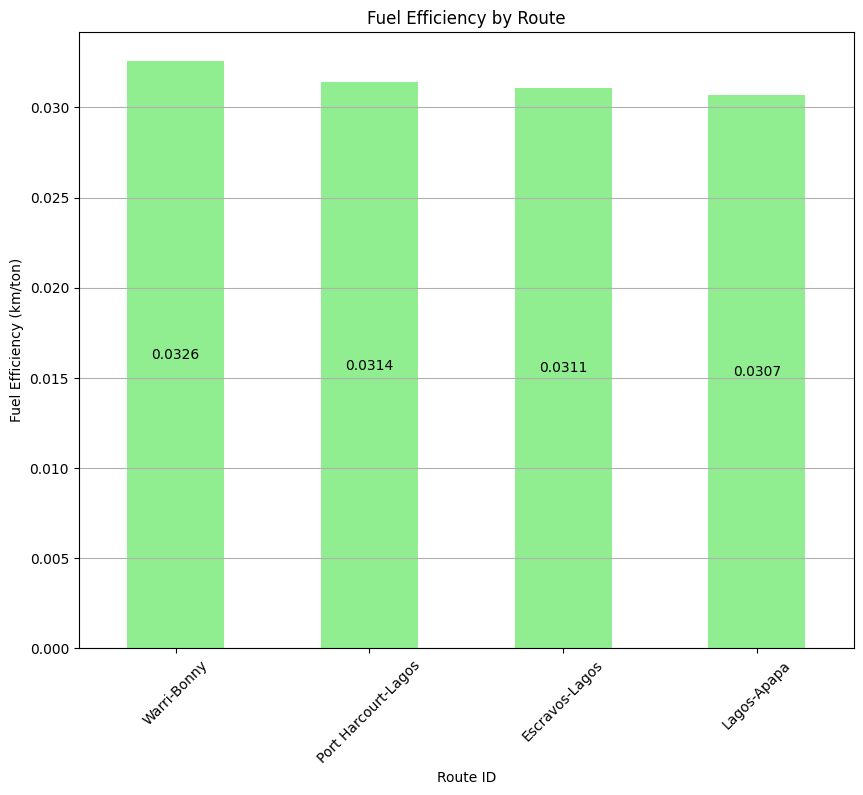

In [274]:
# Visualize fuel efficiency by route
plt.figure(figsize=(10, 8))
ax = route_summary.sort_values('fuel_efficiency', ascending=False)['fuel_efficiency'].plot(kind='bar', color='lightgreen')
plt.title('Fuel Efficiency by Route')
plt.xlabel('Route ID')
plt.ylabel('Fuel Efficiency (km/ton)')
plt.xticks(rotation=45)
plt.grid(axis='y')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}',  # Show more decimal places
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 0),
                textcoords='offset points')

plt.show()

In [275]:
# Prepare data for Fuel consumption prediction
X = data[['distance', 'engine_efficiency']]
y = data['fuel_consumption']

In [276]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [277]:
predict = model.predict(X)
mse = mean_squared_error(y, predict)
r2 = r2_score(y, predict)

In [278]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2553137.660006297
R-squared: 0.8932567571492438


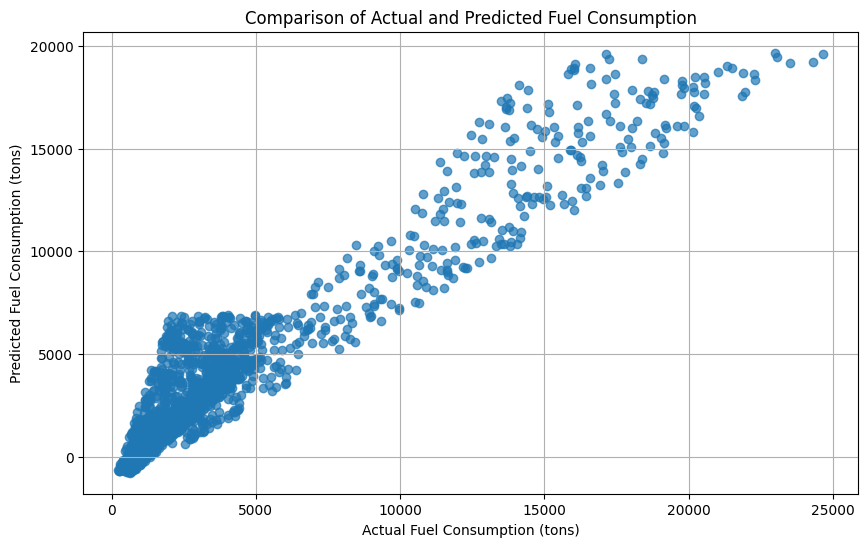

In [279]:
plt.figure(figsize=(10, 6))
plt.scatter(y, predict, alpha=0.7)
plt.title('Comparison of Actual and Predicted Fuel Consumption')
plt.xlabel('Actual Fuel Consumption (tons)')
plt.ylabel('Predicted Fuel Consumption (tons)')
plt.grid(True)
plt.show()



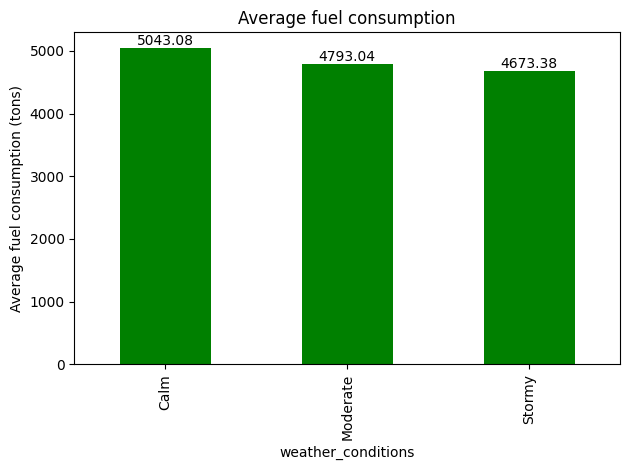

In [287]:
# Average fuel consumption analysis
weather_summary = data.groupby('weather_conditions')['fuel_consumption'].mean()

ax = weather_summary.plot(kind='bar', color='green', title='Average fuel consumption', ylabel='Average fuel consumption (tons)')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

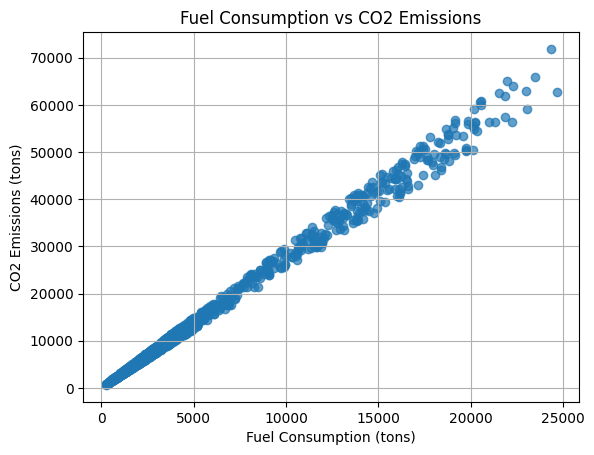

In [292]:
# Fuel consumption
plt.scatter(data['fuel_consumption'], data['CO2_emissions'], alpha=0.7)
plt.title('Fuel Consumption vs CO2 Emissions')
plt.xlabel('Fuel Consumption (tons)')
plt.ylabel('CO2 Emissions (tons)')
plt.grid(True)
plt.show()

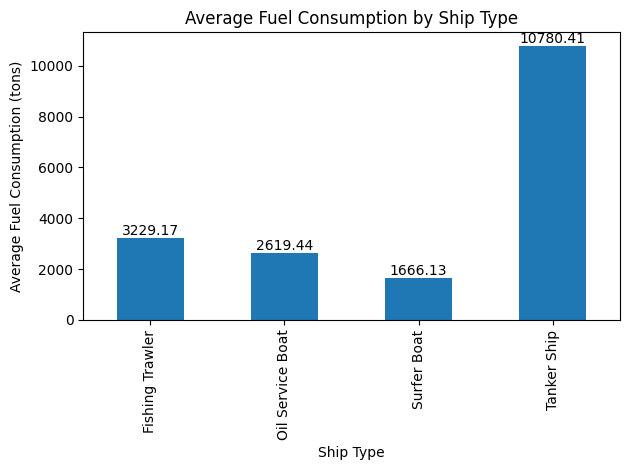

In [293]:
# Calculate average fuel consumption by ship type
ship_type_summary = data.groupby('ship_type')['fuel_consumption'].mean()

ax = ship_type_summary.plot(kind='bar', title='Average Fuel Consumption by Ship Type', ylabel='Average Fuel Consumption (tons)', xlabel='Ship Type')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Annotate with 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [295]:
# CO@ Emission prediction
X = data[['fuel_consumption', 'engine_efficiency']]
y = data['CO2_emissions']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

predict = model.predict(X)
mse = mean_squared_error(y, predict)
r2 = r2_score(y, predict)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 192076.54920360306
R-squared: 0.998955840673787


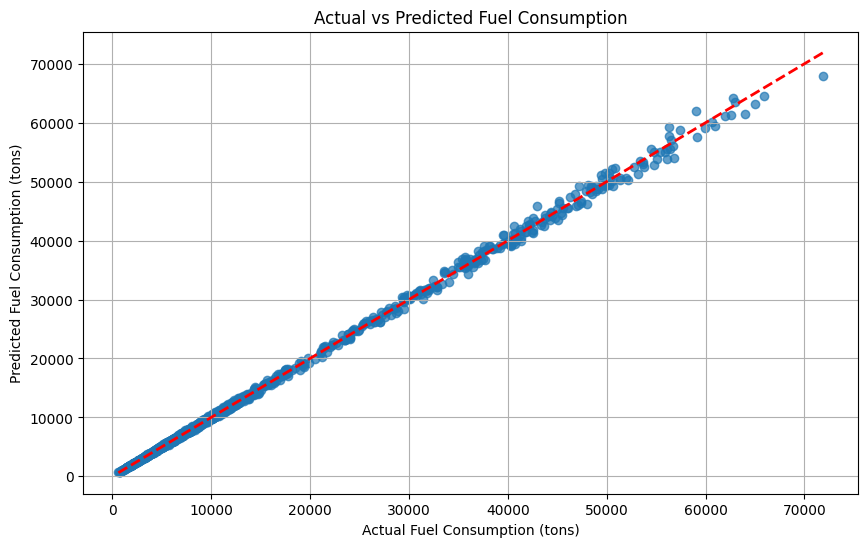

In [296]:
plt.figure(figsize=(10, 6))
plt.scatter(y, predict, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Диагональная линия
plt.title('Actual vs Predicted Fuel Consumption')
plt.xlabel('Actual Fuel Consumption (tons)')
plt.ylabel('Predicted Fuel Consumption (tons)')
plt.grid(True)
plt.show()